In [1]:
import numpy as np

In [2]:
my_arr = np.arange(10000)
my_list = list(range(10000))

## 実行速度の違い

In [5]:
# numpyを駆使した場合
%time for _ in range(10) : my_arr2 = my_arr * 2

CPU times: user 375 µs, sys: 89 µs, total: 464 µs
Wall time: 510 µs


In [6]:
# リスト内包表記を用いた場合
%time for _ in range(10) : my_list_2 = [i * 2 for i in my_list]

CPU times: user 6.62 ms, sys: 0 ns, total: 6.62 ms
Wall time: 6.59 ms


## ndarray = 多次元配列オブジェクト

In [8]:
dat = np.random.randn(2, 3) # ２行3列の行列
dat * 10

array([[-9.42496694, -2.07680021,  0.17382428],
       [-0.95911334,  2.32074871,  3.19714301]])

In [9]:
dat.shape

(2, 3)

In [13]:
# ndarrayの生成
data = [1,2,3,4,5,6,7,8,9,10,11,12]
data2 = [[1,2,3,4,5,6],[7,8,9,10,11,12]]
np.array(data) , np.array(data2) # 元のリストが配列なので２行1列になっている

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([[ 1,  2,  3,  4,  5,  6],
        [ 7,  8,  9, 10, 11, 12]]))

In [20]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [21]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [29]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [27]:
np.full((3,3),1)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [30]:
np.empty((3,3))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [33]:
arr = np.array([[1,2,3],[4,5,6]])

arr.T

array([[1, 4],
       [2, 5],
       [3, 6]])

## ビューとスライスの関係をみる

In [38]:
arr = np.arange(10)
arr[5:8] = 12
arr_slice =arr[5:8]
arr_slice
arr_slice[1] = 123

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])

In [42]:
# 上セルの計算をした上でarrを呼び出すとどうなるか？
arr
# スライスは元のndarrayのビューなので、その変更は元のndarryであるarrに変更を加える。ビューは元のオブジェクトと同じメモリを使っている

array([  0,   1,   2,   3,   4,  12, 123,  12,   8,   9])

In [45]:
# これはどうなるか？
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [96]:
# 二次元以上の配列の一部はインデックスで取得
arr2 = np.array([[1,2,3],[4,5,6],[7,8,9]])
arr2[1][2], arr2[1,2] # ←同じ意味を持つ

(6, 6)

In [58]:
arr = np.array([[[1,2,3],[4,5,6]],[[7,8,9],[10,11,12]]])

In [72]:
old = arr[0].copy()

In [73]:
arr[0] = 42

In [74]:
arr

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [75]:
arr[0] = old
arr

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [100]:
arr2[:2, 1:]

array([[2, 3],
       [5, 6]])

In [101]:
arr2

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [105]:
arr1 = np.arange(6).reshape(2,3)
arr2 = np.arange(0,12,2).reshape(2,3)

arr1, arr2

(array([[0, 1, 2],
        [3, 4, 5]]), array([[ 0,  2,  4],
        [ 6,  8, 10]]))

In [107]:
#　要素同士の積（アダマール積）
np.multiply(arr1, arr1)

array([[ 0,  1,  4],
       [ 9, 16, 25]])

In [109]:
# 行列の積
np.dot(arr1, arr1.T)

array([[ 5, 14],
       [14, 50]])

## ブールインデックス

In [168]:
names = np.array(['Bob','Joe','Will','Bob','Will','Joe','Joe'])
data = np.random.randn(7,4)

In [113]:
# dataからBobに対応する行を全て抜き出すことを考える（data = (7,4), names = (7,1)と考えて対応づける）
names == 'Bob'
# 上記でブーリアンが得られるのでこれを利用すると
data[names == 'Bob']
# Bobに該当する1行目と4行目が得られる

array([[-0.07774254,  0.40361286, -0.03694111, -0.45993999],
       [ 0.0640871 ,  0.64925824,  0.59706988,  1.65452407]])

In [120]:
# 確認
data ,data[np.array([True, False, False, True, False, False, False])]

(array([[-0.07774254,  0.40361286, -0.03694111, -0.45993999],
        [-0.87894774, -1.76700479, -0.8237066 , -0.4846586 ],
        [ 0.69306129, -0.34795059,  0.41437573, -0.64242109],
        [ 0.0640871 ,  0.64925824,  0.59706988,  1.65452407],
        [ 0.26341956,  0.89639753,  1.87831497,  0.9118336 ],
        [-0.21358277,  0.11163115,  0.46780135, -2.02386834],
        [-0.97726135,  0.40491445, -1.50157574, -0.10364899]]),
 array([[-0.07774254,  0.40361286, -0.03694111, -0.45993999],
        [ 0.0640871 ,  0.64925824,  0.59706988,  1.65452407]]))

In [123]:
# 真偽値を逆転させると
data[~(names == 'Bob')]
# 2,3,5,6,7行目を得られる

array([[-0.87894774, -1.76700479, -0.8237066 , -0.4846586 ],
       [ 0.69306129, -0.34795059,  0.41437573, -0.64242109],
       [ 0.26341956,  0.89639753,  1.87831497,  0.9118336 ],
       [-0.21358277,  0.11163115,  0.46780135, -2.02386834],
       [-0.97726135,  0.40491445, -1.50157574, -0.10364899]])

In [127]:
# or条件も可能
mask = (names == 'Bob') | (names == 'Will')
#　これを利用して
mask, data[mask]
# 1,3,4,行目を取得できる

(array([ True, False,  True,  True,  True, False, False]),
 array([[-0.07774254,  0.40361286, -0.03694111, -0.45993999],
        [ 0.69306129, -0.34795059,  0.41437573, -0.64242109],
        [ 0.0640871 ,  0.64925824,  0.59706988,  1.65452407],
        [ 0.26341956,  0.89639753,  1.87831497,  0.9118336 ]]))

In [166]:
copied = data[mask]
copied[2] = 10
data

array([[ 1.11663723, -1.94264611,  0.13023187,  0.8296026 ],
       [-1.41291432, -0.74338995,  0.88099826, -0.01389589],
       [-0.2625786 , -0.22526898, -2.15949209,  0.89284618],
       [ 0.63975405,  1.1826284 , -0.98501288, -1.27296363],
       [ 0.1019317 , -0.52284495,  1.04281303, -0.29674831],
       [ 0.13377069,  0.35138525, -0.72696675,  0.00549667],
       [-1.42580668,  0.78072826,  0.17251285,  0.23850331]])

In [155]:
# 正規乱数のプラスマイナスの割合を計算してみる
np.count_nonzero(data > 0) / (data.shape[0] * data.shape[1])

0.5357142857142857

In [181]:
arr3 = np.random.randn(8,4)
print(arr3)

[[ 0.59504503 -1.6355428   0.90165429  0.08369053]
 [-0.11954134  1.82939008  1.90643316 -0.76000129]
 [ 1.84816871 -0.24611251  1.98819217 -2.48625651]
 [ 1.18479438  0.97854189  1.21945247 -0.2118371 ]
 [-0.48062726  0.29469582  0.7041288  -0.14499187]
 [-0.05968341  0.45724085 -0.59119305  0.88106156]
 [-0.20553894 -0.07346129  0.38392512  0.25005995]
 [ 0.71351939  0.12639562  0.40506234 -1.59270735]]


In [182]:
arr3[1]

array([-0.11954134,  1.82939008,  1.90643316, -0.76000129])

In [186]:
for i in range(8):
    for j in range(4):
        arr3[i][j] = i + j
arr3

array([[ 0.,  1.,  2.,  3.],
       [ 1.,  2.,  3.,  4.],
       [ 2.,  3.,  4.,  5.],
       [ 3.,  4.,  5.,  6.],
       [ 4.,  5.,  6.,  7.],
       [ 5.,  6.,  7.,  8.],
       [ 6.,  7.,  8.,  9.],
       [ 7.,  8.,  9., 10.]])

## ファンシーインデックス = インデックス参照に整数配列を使う

In [228]:

print(arr3[[4,3,0,6]])
# 上記で5,4,1,7行目を順に取得している
print(arr3[[4,3,0,6]].shape)
# 負数のインデックスをつける
print(arr3[[-1,-2]])

[[16 17 18 19]
 [12 13 14 15]
 [ 0  1  2  3]
 [24 25 26 27]]
(4, 4)
[[28 29 30 31]
 [24 25 26 27]]


In [203]:
# 複数のインデックスr配列をつける場合
arr3 = np.arange(32).reshape((8,4))
print(arr3)
print('')
print('以下だと部分行列の行と列を入れ替えたものが出力されそう')
print('最初の[0,2,4,6]はarr3のインデックスで行を取得、次の[3,2,1,0]は取得した行の対応する要素を取得、例：(0,0)なので0行目3列目の値=0を取得')
print(arr3[[0,2,4,6],[0,3,1,2]])
print('')
print('部分行列の行と列を入れ替えたものは以下の通り')
print(arr3[[0,2,4,6]][:,[0,3,1,2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]

以下だと部分行列の行と列を入れ替えたものが出力されそう
最初の[0,2,4,6]はarr3のインデックスで行を取得、次の[3,2,1,0]は取得した行の対応する要素を取得、例：(0,0)なので0行目3列目の値=0を取得
[ 0 11 17 26]

部分行列の行と列を入れ替えたものは以下の通り
[[ 0  3  1  2]
 [ 8 11  9 10]
 [16 19 17 18]
 [24 27 25 26]]


In [227]:
print(arr3[[1,5,7,2]]) # インデックスで行取得
print(arr3[[1,5,7,2]][:]) # インデックスで行取得,全列取得
print(arr3[[1,5,7,2]][:,2]) #インデックスで取得、全列取得,うち３要素目だけ取得
print(arr3[[1,5,7,2]][:,[0,3,1,2]]) #インデックスで取得、全列取得,要素を入れ替えて取得するために要素の順番を指定したリストを要素引数に渡す
# 最後の[0,3,1,2]がファンシーインデックス

[[ 4  5  6  7]
 [20 21 22 23]
 [28 29 30 31]
 [ 8  9 10 11]]
[[ 4  5  6  7]
 [20 21 22 23]
 [28 29 30 31]
 [ 8  9 10 11]]
[ 6 22 30 10]
[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


## 転置行列

In [231]:
arr = np.arange(15).reshape((3,5))
print(arr.shape)
print(arr.T.shape)

(3, 5)
(5, 3)


In [254]:
# ２次元配列の場合
arr = np.arange(24).reshape((6,4)) 
print(arr)
print('--------------------')
print(arr.T)
print('--------------------')
print(arr.transpose())  #単なる転置-->shapeは(4,6)になる。
print('--------------------')
print(arr.transpose((1,0)))  #転置後の軸を(２軸目,1軸目)に指定-->つまり行列の転換なので通常の転置
print('--------------------')
print(arr.transpose((0,1)))  #転置後の軸を(1軸目、２軸目)に指定-->つまり行列を入れ替えていないので元の行列のまま

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
----------
[[ 0  4  8 12 16 20]
 [ 1  5  9 13 17 21]
 [ 2  6 10 14 18 22]
 [ 3  7 11 15 19 23]]
----------
[[ 0  4  8 12 16 20]
 [ 1  5  9 13 17 21]
 [ 2  6 10 14 18 22]
 [ 3  7 11 15 19 23]]
----------
[[ 0  4  8 12 16 20]
 [ 1  5  9 13 17 21]
 [ 2  6 10 14 18 22]
 [ 3  7 11 15 19 23]]
----------
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [255]:
# 3次元配列の場合
arr = np.arange(24).reshape((2,3,4)) 
print(arr)
print('--------------------')
print(arr.T)
print('--------------------')
print(arr.transpose()) #単なる転置-->shapeは(4,3,2)になる。.Tと同じ結果
print('--------------------')
print(arr.transpose((2,1,0))) #転置後の軸を(3軸目,２軸目,1軸目)に指定-->つまり行列の転換なので通常の転置
print('--------------------')
print(arr.transpose((0,1,2)))  #転置後の軸を(1軸目,2軸目,3軸目)に指定-->つまり行列を入れ替えていないので元の行列のまま
print('--------------------')
print(arr.transpose((2,0,1)))  #転置後の軸を(3軸目,1軸目,2軸目)に指定-->特殊な転置

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
--------------------
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
--------------------
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
--------------------
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
--------------------
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
--------------------
[[[ 0  4  8]
  [12 16 20]]

 [[ 1  5  9]
  [13 17 21]]

 [[ 2  6 10]
  [14 18 22]]

 [[ 3  7 11]
  [15 19 23]]]


In [260]:
# swapaxesは軸の入れ替えを直接指示
arr = np.arange(24).reshape((2,3,4)) 
print(arr)
print('--------------------')
print(arr.transpose((2,1,0))) #転置後の軸を(3軸目,２軸目,1軸目)に指定-->つまり行列の転換なので通常の転置
print('--------------------')
print(arr.swapaxes(0,2)) # １軸目と3軸目を入れ替え。上と同じになる。

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
--------------------
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]
--------------------
[[[ 0 12]
  [ 4 16]
  [ 8 20]]

 [[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]]


## ユニバーサル関数

In [261]:
arr = np.arange(10)

In [270]:
# 要素後ごとに基本的な計算処理をする
print(np.sqrt(arr)) # 平方根
print(np.exp(arr)) # e^x
print(np.log(arr)) # 自然対数
print(np.log1p(arr)) # 要素に1を加えて自然対数をとったもの


[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]
[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]
[      -inf 0.         0.69314718 1.09861229 1.38629436 1.60943791
 1.79175947 1.94591015 2.07944154 2.19722458]
[0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154 2.19722458 2.30258509]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


In [268]:
# 2つのndarrayを引数に演算する２項ufnc
arr1 = np.random.randn(8)
arr2 = np.random.randn(8)
print(arr1)
print(arr2)
print(np.maximum(arr1, arr2)) # arr1とarr2の要素を比べ、大きい方を取得している

[-1.58991445  0.78773017 -0.86809597 -0.85116967 -0.35840879 -0.26787018
  0.21516642  0.73632581]
[ 1.45824057 -1.57202395  2.22778931  0.2571319   1.55626622  0.60255408
 -0.02450423  0.74603759]
[1.45824057 0.78773017 2.22778931 0.2571319  1.55626622 0.60255408
 0.21516642 0.74603759]


## 配列指向プログラミング

In [277]:
points = np.arange(-5, 5, 0.01)
print(points.shape) # 1000次元ベクトル
x, y = np.meshgrid(points, points) # 1000*1000の格子点ができる
x, y # x,yの組み合わせによって任意の座標となる

(1000,)


(array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        ...,
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
        [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]]),
 array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
        [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
        [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
        ...,
        [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
        [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
        [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]]))

In [278]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image $\\sqrt{x^2+y^2}$ for a grid of values')

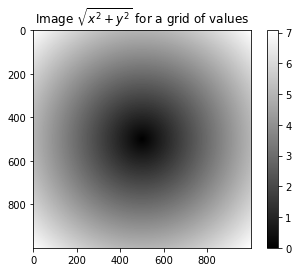

In [282]:
z = np.sqrt(x**2 + y**2)
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title('Image $\sqrt{x^2+y^2}$ for a grid of values')

## 条件制御

In [304]:
xarr = np.array([1.1,1.2,1.3,1.4,1.5])
yarr = xarr + 1
cond = np.array([1,2,3,4,5])

In [293]:
# condがTrueならxarrの要素、Falseならyarrの要素を取得したい
result = [i if k else j for i, j, k in zip(xarr, yarr, cond)]
result
#　この方法は配列が大きくなった時に非効率

[1.1, 2.2, 1.3, 1.4, 2.5]

In [305]:
# 高速な方法
result = np.where([cond % 2 != 0], xarr, yarr) # 引数が(条件、Trueのとき、Falseのとき)
result

array([[1.1, 2.2, 1.3, 2.4, 1.5]])

In [310]:
# こんなことも
np.where([cond % 2 != 0], 1, 0)

array([[1, 0, 1, 0, 1]])

## 数学関数、統計関数

In [313]:
arr = np.random.randn(5,4)
arr

array([[-1.63201682, -1.3703389 ,  0.8756901 ,  0.76410134],
       [ 0.50922298,  0.40017759,  0.94552207,  0.61099804],
       [ 1.15261224, -0.27727553, -0.41663407, -0.18357975],
       [ 0.36398976,  0.93171038,  0.28088952,  1.44663903],
       [-0.9971754 , -0.10545982,  0.46579115, -0.87653242]])

In [319]:
# 同じ
print(np.mean(arr))
print(arr.mean())

0.14441657591651585
0.14441657591651585


In [318]:
# 同じ
print(np.sum(arr))
print(arr.sum())

2.8883315183303173
2.8883315183303173


In [348]:
# 軸を指定して計算できる
print('列方向（各行の同じ列ごと）の平均', arr.mean(axis = 0)) # 元の行列が（5,4）　なので、要素は4つ
print('行方向（各列の同じ行ごと）の平均', arr.mean(axis = 1)) # 元の行列が（5,4）　なので、要素は5つ

列方向（各行の同じ列ごと）の平均 [-0.12067345 -0.08423725  0.43025175  0.35232525]
行方向（各列の同じ行ごと）の平均 [-0.34064107  0.61648017  0.06878072  0.75580717 -0.37834412]


In [364]:
# 累積和や累積積
arr2 = np.array(np.arange(1, 8))
print(arr2)
print('累積和', arr2.cumsum()) 
print('累積積', arr2.cumprod())

[1 2 3 4 5 6 7]
累積和 [ 1  3  6 10 15 21 28]
累積積 [   1    2    6   24  120  720 5040]


In [369]:
# axisの指定も可能
arr3 = np.array([np.arange(1, 4),np.arange(4, 7),np.arange(7, 10)])
print(arr3)
print('列累積和', arr3.cumsum(axis = 0)) 
print('行累積和', arr3.cumsum(axis = 1)) 

[[1 2 3]
 [4 5 6]
 [7 8 9]]
列累積和 [[ 1  2  3]
 [ 5  7  9]
 [12 15 18]]
行累積和 [[ 1  3  6]
 [ 4  9 15]
 [ 7 15 24]]


## 真偽値配列関数

In [374]:
# True=1,False=0となることを利用する
arr = np.random.randn(100)
print('正の値の個数 = ', (arr > 0).sum())
print('負の値の個数 = ', (arr < 0).sum())

正の値の個数 =  54
負の値の個数 =  46


In [376]:
# any = 1つでもTrueが歩かないか、all = 全てTrueかどうか
print((arr > 0).any()) 
print((arr > 0).all())

True
False


## ソート

In [394]:
# １次元の場合はシンプルなソート
arr1 = np.random.randn(5)
arr1.sort()
arr1

array([-1.66532975, -0.96752704, -0.7463735 , -0.31404279,  0.00680674])

In [398]:
# ２次元以上の場合には任意の軸でソート可能
arr = np.random.randn(5,3)
arr

array([[ 0.57325269,  1.30978664,  0.72386596],
       [-0.30980055, -0.43285278, -0.1299019 ],
       [-0.10844082,  1.51353158,  0.36201386],
       [ 1.34620429,  1.1033358 , -0.57210311],
       [-1.33287487,  0.3955701 , -0.64482598]])

In [396]:
arr.sort(axis=1) # 行方向でソート
arr

array([[-1.20738289,  0.53512937,  1.12608104],
       [-1.67610795,  0.19590571,  2.27028115],
       [-0.60153138, -0.17617725,  1.93876838],
       [-0.97396901, -0.82369046, -0.69385185],
       [-1.02065041, -0.6956324 ,  0.25853972]])

In [399]:
arr.sort(axis=0) # 列方向でソート
arr

array([[-1.33287487, -0.43285278, -0.64482598],
       [-0.30980055,  0.3955701 , -0.57210311],
       [-0.10844082,  1.1033358 , -0.1299019 ],
       [ 0.57325269,  1.30978664,  0.36201386],
       [ 1.34620429,  1.51353158,  0.72386596]])

In [408]:
# 5%点を取得することを考える
lange = np.random.randn(10000)
lange.sort()
lange[int(0.05 * len(lange))]

-1.6318543451596328

In [416]:
# 集合（set）のおさらい
names = ['Bob', 'Will', 'Smith', 'Will', 'Smith', 'Adam']
print(type(set(names)), type(names))
names2 = {'B','A','C','B','C'}
print(type(names2))

<class 'set'> <class 'list'>
<class 'set'>


In [433]:
# 行列計算モジュールのインポート
from numpy.linalg import inv, qr

In [434]:
X = np.random.randn(5,5)

In [436]:
mat = np.dot(X.T, X)
mat

array([[ 5.1197193 , -2.84039127,  2.59947169, -0.40233949, -0.20669241],
       [-2.84039127,  2.66734515,  0.2376354 ,  0.95533676,  0.96648744],
       [ 2.59947169,  0.2376354 ,  4.47909484,  1.98073531, -0.45225269],
       [-0.40233949,  0.95533676,  1.98073531,  5.80270506, -0.47342494],
       [-0.20669241,  0.96648744, -0.45225269, -0.47342494,  7.85754175]])

In [448]:
# 逆行列を返す
invers = inv(mat)
invers

array([[ 31.87384342,  36.40022639, -22.45200231,   3.49601174,
         -4.72045338],
       [ 36.40022639,  41.99135673, -25.63487234,   3.91654091,
         -5.4469606 ],
       [-22.45200231, -25.63487234,  16.07901101,  -2.55280586,
          3.33416463],
       [  3.49601174,   3.91654091,  -2.55280586,   0.6004852 ,
         -0.50052768],
       [ -4.72045338,  -5.4469606 ,   3.33416463,  -0.50052768,
          0.83482341]])

In [449]:
# 逆行列か確かめる
i_mat = mat.dot(invers)
print(np.round(i_mat))
# 確かに逆行列を得られている

[[ 1. -0.  0. -0. -0.]
 [ 0.  1.  0.  0.  0.]
 [ 0. -0.  1.  0.  0.]
 [ 0.  0. -0.  1. -0.]
 [ 0. -0. -0. -0.  1.]]


In [452]:
# QR分解 --> 直交行列Qと上三角行列Rに分解する
q, r = qr(mat)
print(q, r)

[[-0.79722425  0.04307027  0.08327492 -0.08697589 -0.58998214]
 [ 0.4422955  -0.49984454 -0.01563648  0.30136138 -0.68078407]
 [-0.40478037 -0.71060481 -0.19302218  0.34681732  0.41671793]
 [ 0.06265086 -0.32262312 -0.50654382 -0.79466284 -0.06255806]
 [ 0.0321854  -0.37316955  0.83604819 -0.38709847  0.10433974]] [[-6.42193119  3.43895287 -3.67076766  0.28984025  0.99855388]
 [ 0.         -2.2933366  -3.65995124 -3.59778785 -2.95008029]
 [ 0.          0.         -2.03324393 -3.7658992   6.86406411]
 [ 0.          0.          0.         -3.41808329 -2.513039  ]
 [ 0.          0.          0.          0.          0.12498421]]


### よく使うnumpy.linalgの関数

In [453]:
mat = np.arange(9).reshape(3,3)
mat

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [455]:
# 対角要素を返す
np.diag(mat)

array([0, 4, 8])

In [456]:
# 内積
np.dot(mat,mat)

array([[ 15,  18,  21],
       [ 42,  54,  66],
       [ 69,  90, 111]])

In [457]:
# 対角要素の和 = トレースを返す
np.trace(mat)

12

In [460]:
# 行列式
np.linalg.det(mat) # ０なので正則ではない。逆行列が存在しない

0.0

In [ ]:
# 逆行列
inv(mat) # これはエラーになる

In [464]:
# 擬似逆行列
np.linalg.pinv(mat)

array([[-0.55555556, -0.16666667,  0.22222222],
       [-0.05555556,  0.        ,  0.05555556],
       [ 0.44444444,  0.16666667, -0.11111111]])

In [466]:
# 擬似逆行列の性質
mat @ np.linalg.pinv(mat) @ mat # matに一致する

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [473]:
# QR分解
q, r = qr(mat)
print(q)  # 直交行列
print(r)  # 上三角行列
print(q @ q.T) # 直交行列の性質
print(q @ r) # 分解したものをかけると元にもどる

[[ 0.          0.91287093  0.40824829]
 [-0.4472136   0.36514837 -0.81649658]
 [-0.89442719 -0.18257419  0.40824829]]
[[-6.70820393 -8.04984472 -9.39148551]
 [ 0.          1.09544512  2.19089023]
 [ 0.          0.         -0.        ]]
[[ 1. -0. -0.]
 [-0.  1. -0.]
 [-0. -0.  1.]]
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [478]:
# 特異値分解
np.linalg.svd(mat) # 勉強する

(array([[-0.13511895,  0.90281571,  0.40824829],
        [-0.49633514,  0.29493179, -0.81649658],
        [-0.85755134, -0.31295213,  0.40824829]]),
 array([14.22670739,  1.26522599,  0.        ]),
 array([[-0.4663281 , -0.57099079, -0.67565348],
        [-0.78477477, -0.08545673,  0.61386131],
        [-0.40824829,  0.81649658, -0.40824829]]))

In [481]:
# 正方行列Aに対してAx=bを解く
b = np.array([2,4,6])
np.linalg.solve(mat, b) 

LinAlgError: Singular matrix